# powerindex

A python library to compute power indices

__Installation__: pip install powerindex

## What is all about

The aim of the package is to compute different power indices of the so-called weighted voting systems (games). This package was employed to perform calculations at [powdist.com](powdist.com)

Players have weights and can form coalitions. A coalition that achieves the required threshold wins.

To start with a simple example, consider a system with two parties __A__ and  **B** having 51 and 49 seats respectively with a simple majority rule (i.e. the threshold is 51 seats). How much power do they have? It may appear that according to the number of the seats they have 51% and 49% respectively.

However, party **A** can impose any decision without cooperating with party __B__.

It leads to a conclusion that any reasonable rule would assign to party **A** 100% of the power (since it wins without cooperation) and to the party __B__ 0% of the power and not 51% to 49%.

The most popular approaches to measure power are [Banzhaf](http://en.wikipedia.org/wiki/Banzhaf_power_index) and [Shapley-Shubik](http://en.wikipedia.org/wiki/Shapley–Shubik_power_index) power indices.

## How to use it

Let's implement an example from the introduction:


In [1]:
%matplotlib inline
import powerindex as px
game=px.Game(quota=51,weights=[51,49])

Now calculate Banzhaf and Shapley-Shubik power indices:

In [2]:
game.calc_banzhaf()
print(game.banzhaf)

[1.0, 0.0]


In [3]:
game.calc_shapley_shubik()
print(game.shapley_shubik)

[1.0, 0.0]


Function calc() computes all available indices.

Thus, in this simple example both indices give 100% to 0% distribution.

Now let's changes the seats distribution to the parity and see what happens:

In [4]:
game=px.Game(51,weights=[50,50])
game.calc()

print(game.banzhaf)
print(game.shapley_shubik)

[0.5, 0.5]
[0.5, 0.5]


As the result, the power distribution is also at parity.

Now, consider a non-trivial, but still simple examples from [Wikipedia](https://en.wikipedia.org/wiki/Banzhaf_power_index#Simple_voting_game):

In [5]:
game=px.Game(6,[4, 3, 2, 1])
game.calc_banzhaf()
print(game.banzhaf)

[0.4166666666666667, 0.25, 0.25, 0.08333333333333333]


Interpretation is simple. A committee where 4 parties hold 40%, 30%, 20% and 10% of seats with required qualified majority of 60%, have 41.7%, 25%, 25%, 8.3% of power respectively.

In this example, having 2 or 3 seats leads to the same level of power.

Another example:

In [6]:
game=px.Game(6,[3, 2, 1, 1])
game.calc_banzhaf()
print(game.banzhaf)

[0.375, 0.375, 0.125, 0.125]


Notice that in the previous two examples Banzhaf and Shapley-Shubik indices coincides. It doesn't hold in general even in the games of 3 voters:

In [7]:
game=px.Game(4,[3, 2, 1])
game.calc() # again it calculates all available indices
print("Banzhaf index:")
print(game.banzhaf)
print("Shapley-Shubik index:")
print(game.shapley_shubik)

Banzhaf index:
[0.6, 0.2, 0.2]
Shapley-Shubik index:
[0.6666666666666667, 0.16666666666666669, 0.16666666666666669]


## Plot results

There's a possibility to plot the power distribution as a pie chart:

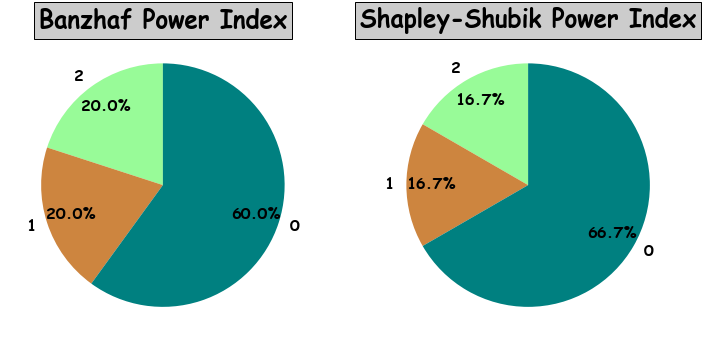

In [8]:
game=px.Game(4,[3, 2, 1])
game.calc()
game.pie_chart()

As you can see on the plot, the parties have numbers. In order, to put their names on the chart you need to work with Party class. 

Let's take Europen Economic Community (EEC) in the years 1958-1972, its members were Germany (4 votes), France (4 votes), Italy (4 votes), Belgium (2 votes), Netherlands (2 votes) and Luxembourg (1 vote) with qualified majority of 12 votes:

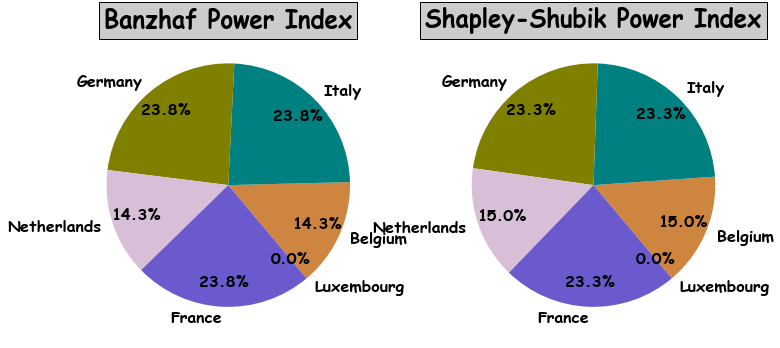

In [9]:
countries={"Germany":4,"France":4,"Italy":4,"Belgium":2,"Netherlands":2,"Luxembourg":1}
parties=[px.Party(countries[country],country) for country in countries]
game=px.Game(12,parties=parties)
game.calc()
game.pie_chart()


## On computation

Usually the exact and fast computation of indices is based on enumeration methods implemented by dynamic programming given that the weights and thresholds are integers. 

For instance, the computation of Banzhaf is O(qn) hard and computation of Shapley-Shubik is O(qn^2) hard. If the input has non-integers, then an approximation scheme is usually involved. Consult the list of literature if you want to start exploring the topic by yourself.

## Literature

B.Keijzer - A Survey on the Computation of Power Indices (2008)

T.Uno - Efficient Computation of Power Indices for Weighted Majority Games (2003)

Matsui, Y. Matsui - A Survey of Algorithms for Calculating Power Indices of Weighted Majority Games (2000)
B.Meglicki - Generating functions partitioning algorithm for com­puting power indices in weighted voting games (20??)

Zyczkowski, W. Slomczynski - Voting in the European Union: the square root system of Penrose and a critical point (2004)